Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import datatable as dt

#### IMPORT DATASETS

In [2]:
profiles=dt.fread(r"D:\DATASET_ADM-HW2\archive\instagram_profiles.csv").to_pandas()

In [9]:
locations=dt.fread(r"D:\DATASET_ADM-HW2\archive\instagram_locations.csv").to_pandas()

In [10]:
posts=dt.fread(r"D:\DATASET_ADM-HW2\archive\instagram_posts.csv", 
               sep="\t", 
               columns={"sid_profile","profile_id","location_id","post_type","numbr_likes","number_comments"}).to_pandas()

#### Plot the top 10 most popular users in terms of followers and their number of posts.

In [11]:
ten_most_inf_user=profiles.sort_values(by=["followers"],ascending=False)
ten_most_inf_user=ten_most_inf_user.head(10)
print(f"The ten most influential users are: {ten_most_inf_user.profile_name.values}")

The ten most influential users are: ['instagram' 'victoriassecret' 'nba' 'louisvuitton' 'buzzfeedtasty'
 'andresiniesta8' 'hm' 'princessyahrini' 'danbilzerian' 'akshaykumar']


<BarContainer object of 10 artists>

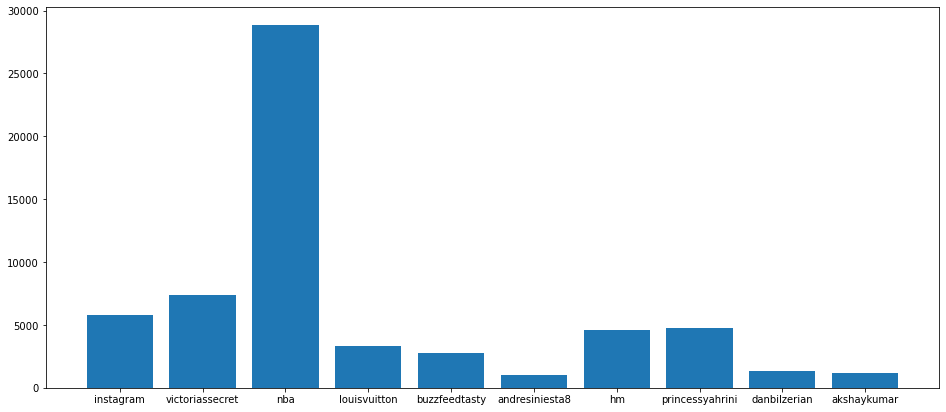

In [12]:
fig, ax = plt.subplots(figsize =(16, 7))
plt.bar(ten_most_inf_user.profile_name,ten_most_inf_user.n_posts)

#### Who is the most influential user?

In [13]:
most_inf_user=profiles.sort_values(by="followers",ascending=False)
most_inf_user=most_inf_user.head(1)
print(f"The most influential user is: {most_inf_user.profile_name.values[0]}")

The most influential user is: instagram


#### Have they posted anything with tagged locations? Extract the most frequent areas on their posts and plot the number of times each city has been visited.

In [14]:
post_ten=ten_most_inf_user.merge(posts,on="profile_id")

In [15]:
post_ten_loc=post_ten.merge(locations, left_on="location_id",right_on="id")
post_ten_loc_=post_ten_loc[["profile_id","profile_name",
                           "location_id","name","post_type"]]

#### 
By merging the datasets through the location_id variable we can see that there is a match, so we can say that yes, the ten most influential profiles have posted something with tagged locations. 

In [19]:
# count how many times each locations appears
post_ten_loc_count=post_ten_loc_.name.value_counts()
# consider only locations that appear more than once
post_ten_loc_count_names=post_ten_loc_count[post_ten_loc_count>1]
print(f"The most tagged locations are:\n {post_ten_loc_count_names}")

The most tagged locations are:
 Sydney, Australia              9
Victoria's Secret              4
Kobe-shi, Hyogo, Japan         3
Wells Fargo Center             2
Bel-Air Estate                 2
Bora Bora, French Polynesia    2
Name: name, dtype: int64


In [20]:
from collections import Counter
top_10_locations = Counter(post_ten_loc.name).most_common(6)
top_10_locations = list(zip(*top_10_locations))
x, y = top_10_locations[0], top_10_locations[1]

<BarContainer object of 6 artists>

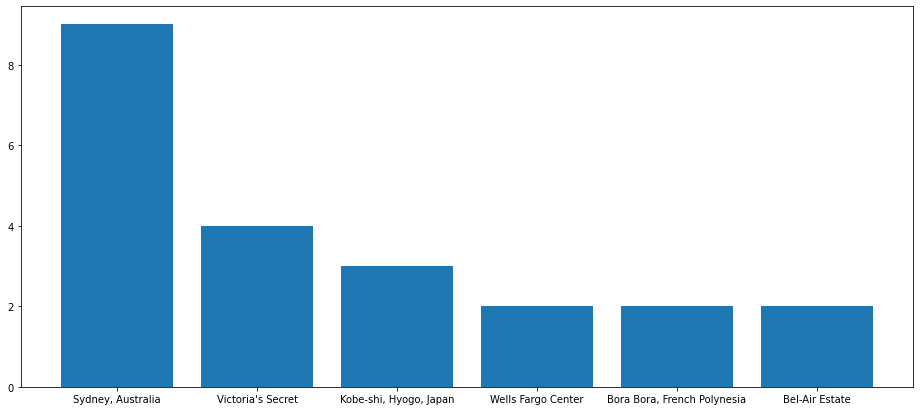

In [21]:
fig, ax = plt.subplots(figsize =(16, 7))
plt.bar(x, y) 

#### How many pictures-only posts have they published? How many reels? (only videos) and how many with both contents? Provide the number as percentages and interpret those figures.

In [22]:
post_ten=ten_most_inf_user.merge(posts,on="profile_id")
post_ten

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account,sid_profile,location_id,post_type,numbr_likes,number_comments
0,336492,25025320.0,instagram,Instagram,Bringing you closer to the people and things y...,226.0,285457645.0,5760.0,help.instagram.com,,False,336492,5.332856e+06,1,125428.0,1240.0
1,336492,25025320.0,instagram,Instagram,Bringing you closer to the people and things y...,226.0,285457645.0,5760.0,help.instagram.com,,False,336492,5.873874e+08,1,669786.0,4818.0
2,336492,25025320.0,instagram,Instagram,Bringing you closer to the people and things y...,226.0,285457645.0,5760.0,help.instagram.com,,False,336492,8.770667e+14,1,1914299.0,20065.0
3,336492,25025320.0,instagram,Instagram,Bringing you closer to the people and things y...,226.0,285457645.0,5760.0,help.instagram.com,,False,336492,3.500213e+08,1,840588.0,3627.0
4,336492,25025320.0,instagram,Instagram,Bringing you closer to the people and things y...,226.0,285457645.0,5760.0,help.instagram.com,,False,336492,5.243120e+08,1,385494.0,5664.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,3513205,907025384.0,akshaykumar,Akshay Kumar,#AkshayKumar,5.0,26252169.0,1173.0,bit.ly/AliAliBlank,2019-05-14 08:29:29.754 -0400,False,3513205,NaN,1,241543.0,1152.0
137,3513205,907025384.0,akshaykumar,Akshay Kumar,#AkshayKumar,5.0,26252169.0,1173.0,bit.ly/AliAliBlank,2019-05-14 08:29:29.754 -0400,False,3513205,NaN,1,797506.0,2733.0
138,3513205,907025384.0,akshaykumar,Akshay Kumar,#AkshayKumar,5.0,26252169.0,1173.0,bit.ly/AliAliBlank,2019-05-14 08:29:29.754 -0400,False,3513205,NaN,1,921671.0,9349.0
139,3513205,907025384.0,akshaykumar,Akshay Kumar,#AkshayKumar,5.0,26252169.0,1173.0,bit.ly/AliAliBlank,2019-05-14 08:29:29.754 -0400,False,3513205,NaN,1,1402087.0,16180.0


In [23]:
profile_list=[]

for i in post_ten.profile_name:
    if i not in profile_list:
        profile_list.append(i)
print(profile_list)

['instagram', 'victoriassecret', 'nba', 'louisvuitton', 'buzzfeedtasty', 'andresiniesta8', 'hm', 'princessyahrini', 'danbilzerian', 'akshaykumar']


In [26]:
def count_posts_type (profile_name):
    rows = post_ten[post_ten.profile_name == profile_name]
    
    photo = rows[rows.post_type == 1].post_type.count()
    video = rows[rows.post_type == 2].post_type.count()
    both=rows[rows.post_type == 3].post_type.count()
    tot=photo+video+both
    
    return photo/tot, video/tot, both/tot
    

In [27]:
for i, profile_name in enumerate(profile_list):
    print(profile_list[i],count_posts_type(profile_name))

instagram (0.9117647058823529, 0.08823529411764706, 0.0)
victoriassecret (0.7142857142857143, 0.2857142857142857, 0.0)
nba (0.7222222222222222, 0.2777777777777778, 0.0)
louisvuitton (1.0, 0.0, 0.0)
buzzfeedtasty (1.0, 0.0, 0.0)
andresiniesta8 (1.0, 0.0, 0.0)
hm (1.0, 0.0, 0.0)
princessyahrini (0.8846153846153846, 0.11538461538461539, 0.0)
danbilzerian (1.0, 0.0, 0.0)
akshaykumar (1.0, 0.0, 0.0)


#### 
The first thing we can notice is that for none of the 10 profiles considered were there any posts containing both photos and videos. 
Moreover, for all profiles for which it turns out that 100% of the likes are for posts with only photos, a true interpretation cannot be given because only the type of posts with only photos were recorded, so it is not possible to make a comparison with posts in which there are also videos.
Finally, it can be said that, in general, posts containing only photos receive the most likes.
However, this is not a very true interpretation because if you look at the amount of registered posts divided by type, you realise that most of the registered posts for each profile contain only photos so the comparison is not made on the same conditions. 

#### How many "likes" and comments did posts with only pictures receive? How about videos and mixed posts? Try to provide the average numbers and confront them with their followers amount, explaining what you can say from that comparison.

In [29]:
post_ten_followers_likes=post_ten.groupby(['profile_name',"followers",'post_type'],sort=False)['numbr_likes'].sum()

In [49]:
def avg_likes (profile_name):
    rows = post_ten[post_ten.profile_name == profile_name]
    
    photo = rows[rows.post_type == 1].numbr_likes.sum()
    video = rows[rows.post_type == 2].numbr_likes.sum()
    
    tot=rows.n_posts.sum()
    
    return photo/tot, video/tot

In [53]:
avg_likes_post_type1=[]
avg_likes_post_type2=[]

for profile_name in profile_list:
    a, b = avg_likes(profile_name)
    avg_likes_post_type1.append(a)
    avg_likes_post_type2.append(b)
#print(avg_likes_post_type1,avg_likes_post_type2)

In [54]:
ten_most_inf_user["avg_photo_likes"]=avg_likes_post_type1
ten_most_inf_user["avg_video_likes"]=avg_likes_post_type2

In [57]:
df_new = ten_most_inf_user[['profile_name', 'followers', "n_posts", "avg_photo_likes","avg_video_likes"]]

In [58]:
df_new

,profile_name,followers,n_posts,avg_photo_likes,avg_video_likes
2880218,instagram,285457645.0,5760.0,143.402456,9.090222
2582507,victoriassecret,65269440.0,7355.0,22.409420,10.154725
3820939,nba,35339708.0,28816.0,6.071210,1.998269
701965,louisvuitton,30689316.0,3352.0,55.744928,0.000000
2414951,buzzfeedtasty,30246783.0,2791.0,36.138632,0.000000
2785241,andresiniesta8,29542143.0,990.0,477.800673,0.000000
333193,hm,29176804.0,4566.0,17.786575,0.000000
3934581,princessyahrini,29042823.0,4719.0,26.595327,1.021166
1311970,danbilzerian,26476004.0,1311.0,658.362522,0.000000
1703764,akshaykumar,26252169.0,1173.0,875.619647,0.000000


#### 
As in the previous question, it must be taken into account that for some profiles posts containing videos were not recorded and that the number of posts containing videos recorded is less than those containing photos, so the comparison is not entirely true. 
However, if we were to compare the average number of likes per photo against the number of followers, what we deduce is that the 'active' followers of each profile are very few compared to the actual followers following each account. 
This is particularly evident for the NBA profile and the HM profile, but also for Louis Vuitton, Buzz Feed Tasty and Princess Yahrini. 